# Name: Dhiran Malla
# **Task 2**
## **Aim - To perform Unemployment Analysis**

#### Importing Libraries

In [2]:
# data processing
import numpy as np 
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#### Loading  and understanding the dataset

In [31]:
df=pd.read_csv('Unemployment_Rate_upto_11_2020.csv',encoding='latin-1')
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [32]:
df.rename(columns = {'Region.1':'Area'}, inplace = True) #rename the column to identify easily
df.columns = df.columns.str.strip() # removing unintensionsal spaces from columns

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Region                                   267 non-null    object 
 1   Date                                     267 non-null    object 
 2   Frequency                                267 non-null    object 
 3   Estimated Unemployment Rate (%)          267 non-null    float64
 4   Estimated Employed                       267 non-null    int64  
 5   Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Area                                     267 non-null    object 
 7   longitude                                267 non-null    float64
 8   latitude                                 267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [34]:
df.drop(columns=['Frequency'],inplace=True) # Dropping irrelevent column
df.head(5)

,Region,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,longitude,latitude
0,Andhra Pradesh,31-01-2020,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,17.43,12988845,36.46,South,15.9129,79.74


In [35]:
df['Date'] = pd.to_datetime(df['Date'],dayfirst=True) #converting the 'Date' column to datetime format
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 8 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Region                                   267 non-null    object        
 1   Date                                     267 non-null    datetime64[ns]
 2   Estimated Unemployment Rate (%)          267 non-null    float64       
 3   Estimated Employed                       267 non-null    int64         
 4   Estimated Labour Participation Rate (%)  267 non-null    float64       
 5   Area                                     267 non-null    object        
 6   longitude                                267 non-null    float64       
 7   latitude                                 267 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 16.8+ KB


### EDA: Exploratory Data Analysis

In [36]:
df.isnull().sum() #checking for null values

Region                                     0
Date                                       0
Estimated Unemployment Rate (%)            0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
Area                                       0
longitude                                  0
latitude                                   0
dtype: int64

Since there is no null values, so no need to handle them

In [37]:
df.duplicated().sum() #Checking for duplicate values

0

Dataset does not contain any Duplicated values.

In [38]:
df.describe() #Data summarization

,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
count,267,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,2020-06-16 09:15:30.337078528,12.236929,1.396211e+07,41.681573,22.826048,80.532425
min,2020-01-31 00:00:00,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,2020-03-31 00:00:00,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,2020-06-30 00:00:00,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,2020-08-31 00:00:00,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,2020-10-31 00:00:00,75.850000,5.943376e+07,69.690000,33.778200,92.937600
std,NaN,10.803283,1.336632e+07,7.845419,6.270731,5.831738


*The mean estimated unemployment rate is high. The high unemployment rate could be attributed to the economic disruptions caused by the pandemic, such as lockdowns, reduced economic activity, and job losses in various sectors.*

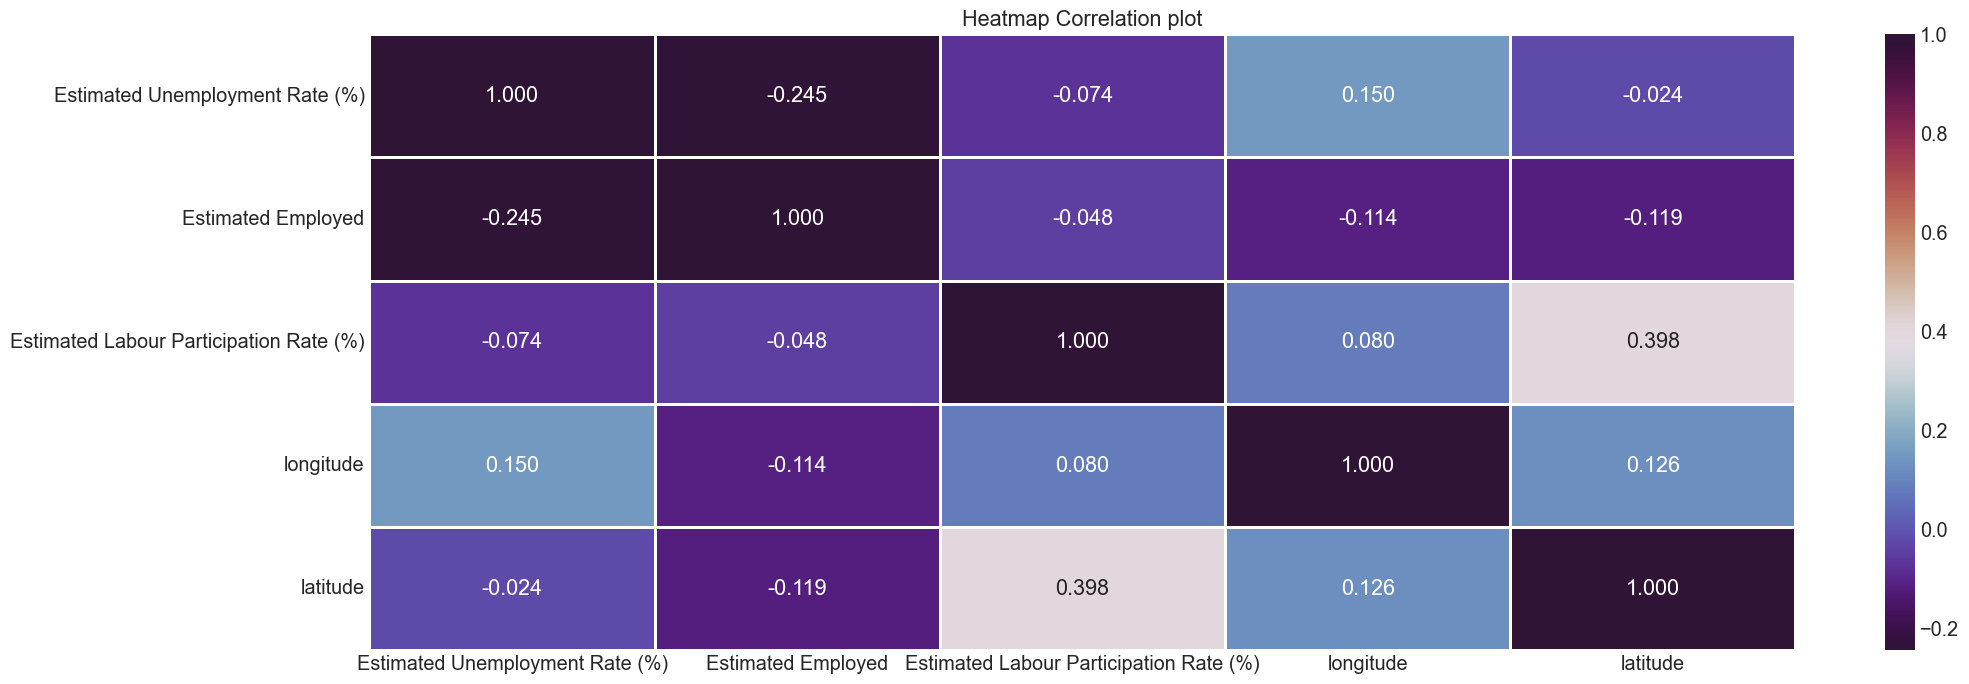

In [41]:
#constructing a 'heatMap' to find the 'pair-wise correlation' values

#dataframe of all the numerical columns
heatMap = df[['Estimated Unemployment Rate (%)', 'Estimated Employed', 
              'Estimated Labour Participation Rate (%)','longitude','latitude']]

#constructing on heatMap with correlation values
heatMap = heatMap.corr()

#plotting the figure
plt.figure(figsize=(23,8))
sns.heatmap(heatMap, annot=True,cmap='twilight_shifted', fmt='.3f', linewidths=1)
plt.title('Heatmap Correlation plot')
plt.show()

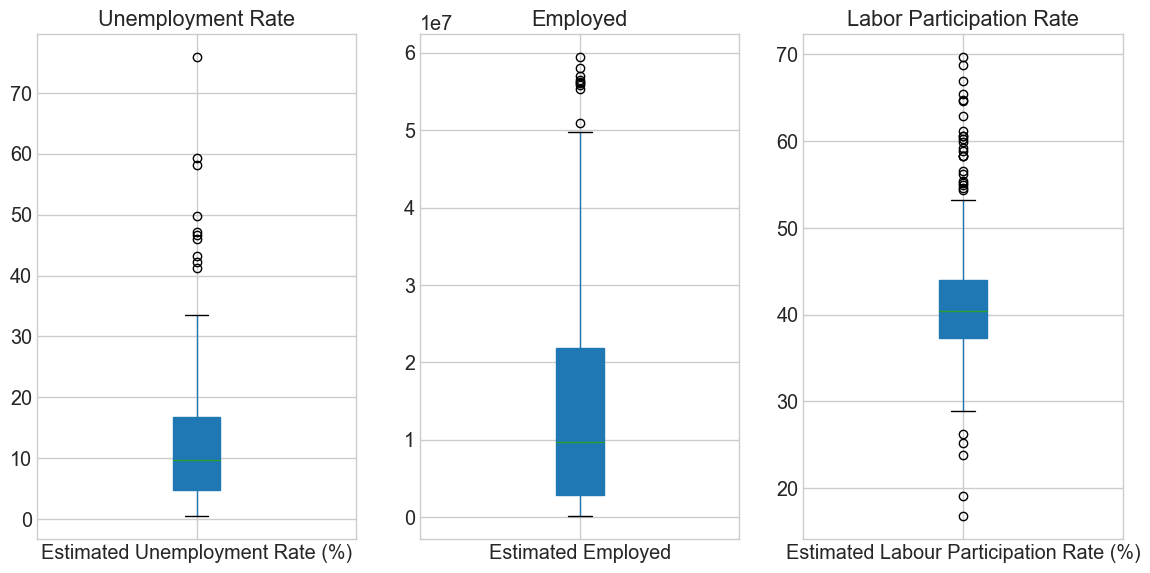

In [44]:
# Create a figure with three subplots
plt.figure(figsize=(12, 6))

# Subplot 1: Unemployment Rate
plt.subplot(131)
df.boxplot(column='Estimated Unemployment Rate (%)', patch_artist=True)
plt.title('Unemployment Rate')

# Subplot 2: Employed
plt.subplot(132)
df.boxplot(column='Estimated Employed', patch_artist=True)
plt.title('Employed')

# Subplot 3: Labor Participation Rate
plt.subplot(133)
df.boxplot(column='Estimated Labour Participation Rate (%)', patch_artist=True)
plt.title('Labor Participation Rate')

plt.tight_layout()
plt.show()

From the above boxplot Outliers are dectected, Since we are analyzing the unemployment during Covid-19 the extreme values in the data are indicative of genuine structural changes or such events therefore we are not removing it.

### Visualization (unemployment analysis through graphs)

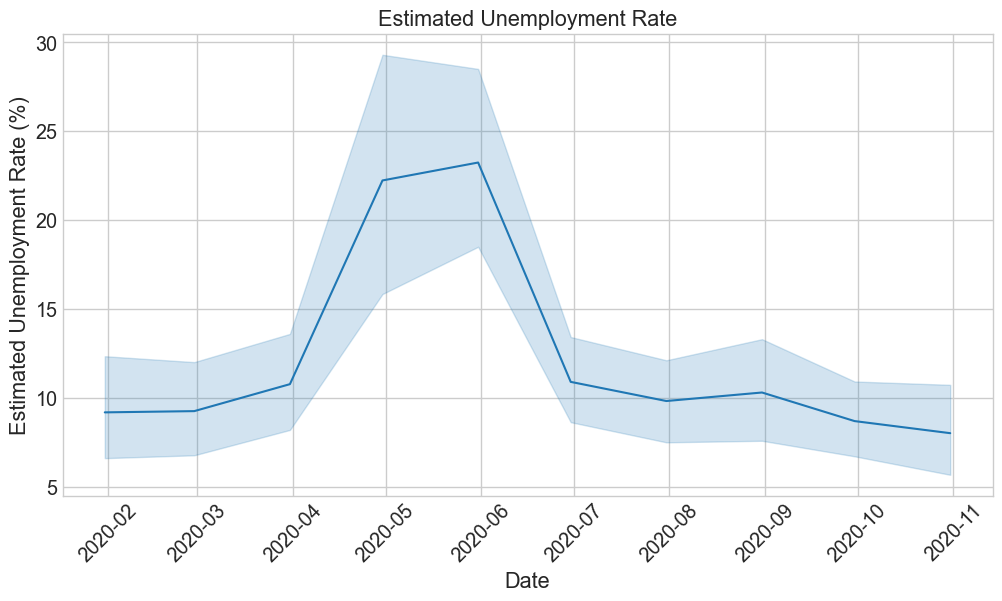

In [47]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='Estimated Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.title('Estimated Unemployment Rate')
plt.show()

The unemployment rate was increased in the months of april, may, june due to the lockdowns which lead to reduced economic activity and job losses in various sectors.

In [56]:
unemployed_by_region = df[['Estimated Unemployment Rate (%)','Region']]
df_unemployed_by_region = unemployed_by_region.groupby('Region').mean().reset_index()

df_unemployed_by_region = df_unemployed_by_region.sort_values('Estimated Unemployment Rate (%)')

fig = px.bar(df_unemployed_by_region, x='Region',y='Estimated Unemployment Rate (%)',color = 'Region',title='Average unemployment rate in each state')
fig.show()

Haryana has the highest estimated unemployment rate, while Meghalaya has lowest rate of estimated unemployment

In [58]:
fig = px.violin(df, x='Area', y='Estimated Unemployment Rate (%)',title='Distribution of Unemployment Rates by Areas',
    box=True, points='all') ## show box plot inside the violin  # Show individual data points

fig.show()

We can see that South and East part of India experienced higher unemployment, Since areas with wider or taller violins have more variability in unemployment rates.

### Summary

1. **Impact of Lockdowns on Unemployment:**
   - The visualizations reveal a noticeable spike in the unemployment rate during the months of April, May, and June. This trend is attributed to lockdown measures that resulted in decreased economic activity and widespread job losses across various sectors.

2. **Regional Disparities in Unemployment:**
   - Haryana stands out with the highest estimated unemployment rate among the regions analyzed, indicating significant economic challenges in the state during the observed period.
   - Conversely, Meghalaya exhibits the lowest estimated unemployment rate, suggesting relatively better employment conditions compared to other regions.

3. **Regional Variation in Unemployment:**
   - The visual analysis highlights a regional disparity in unemployment rates, with the South and East parts of India experiencing higher levels of unemployment. This observation is supported by the wider or taller violins in these areas, indicating greater variability in unemployment rates.

4. **Need for Regional Policy Focus:**
   - Given the regional variations in unemployment rates, policymakers should consider tailored strategies for addressing unemployment challenges in different parts of the country. A targeted approach, focusing on the specific economic dynamics of each region, may be more effective in mitigating unemployment.